<a href="https://colab.research.google.com/github/manni-ramu/Cat-vs-Dog-Classifications/blob/main/Dog_vs_Cat_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# installing the Kaggle library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

100% 810M/812M [00:27<00:00, 32.4MB/s]
100% 812M/812M [00:27<00:00, 31.0MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [ ]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.5974.jpg', 'cat.8814.jpg', 'cat.1932.jpg', 'cat.8521.jpg', 'dog.5927.jpg', 'cat.12106.jpg', 'cat.660.jpg', 'dog.8923.jpg', 'cat.4946.jpg', 'dog.8013.jpg', 'dog.7680.jpg', 'dog.1767.jpg', 'cat.2238.jpg', 'cat.11696.jpg', 'cat.2924.jpg', 'dog.6631.jpg', 'dog.683.jpg', 'dog.8415.jpg', 'cat.2668.jpg', 'cat.3393.jpg', 'dog.3523.jpg', 'dog.4341.jpg', 'cat.12146.jpg', 'dog.10074.jpg', 'cat.9285.jpg', 'dog.10242.jpg', 'cat.2707.jpg', 'dog.3797.jpg', 'cat.8601.jpg', 'dog.5749.jpg', 'dog.11972.jpg', 'cat.4499.jpg', 'cat.7954.jpg', 'dog.9536.jpg', 'cat.10728.jpg', 'dog.2326.jpg', 'cat.3767.jpg', 'dog.8612.jpg', 'cat.8013.jpg', 'cat.4501.jpg', 'dog.3726.jpg', 'dog.9580.jpg', 'cat.4767.jpg', 'dog.3889.jpg', 'cat.1087.jpg', 'dog.10679.jpg', 'cat.11560.jpg', 'cat.2983.jpg', 'dog.886.jpg', 'cat.5429.jpg', 'cat.5387.jpg', 'dog.8696.jpg', 'dog.209.jpg', 'cat.5940.jpg', 'dog.12490.jpg', 'cat.8820.jpg', 'cat.4445.jpg', 'dog.5522.jpg', 'dog.12069.jpg', 'cat.4214.jpg', 'cat.8039.jpg', 'dog.9900.jpg', 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from PIL import Image
from google.colab.patches import cv2_imshow

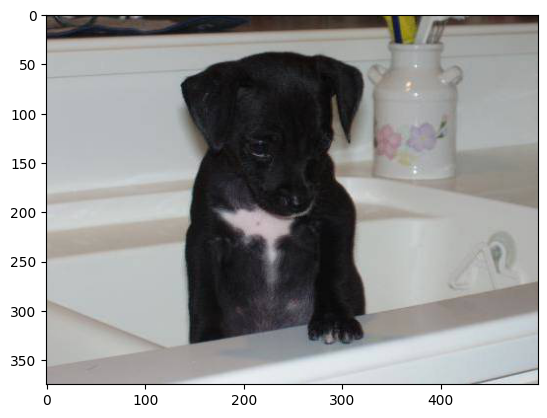

In [ ]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

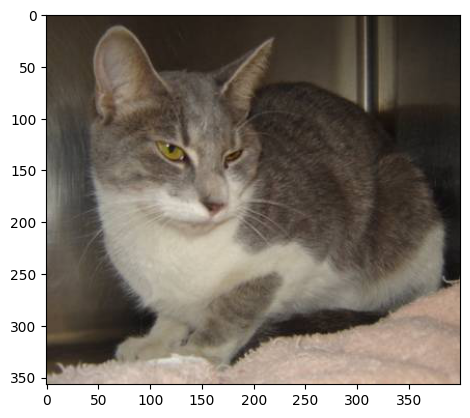

In [ ]:
# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
file_names = os.listdir('/content/train/')
for i in range(5):
  name = file_names[i]
  print(name[0:3])

dog
cat
cat
cat
dog


In [ ]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [ ]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'


for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

dog.5974.jpg
cat.8814.jpg
cat.1932.jpg
cat.8521.jpg
dog.5927.jpg


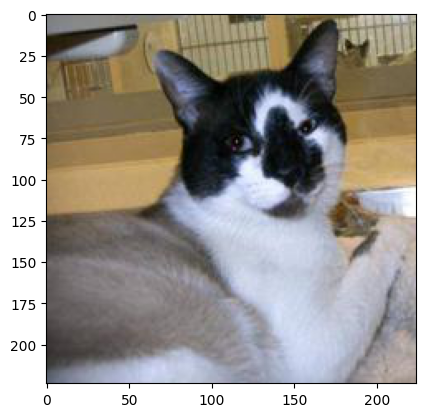

In [ ]:
# display resized dog image
file_names = os.listdir('/content/image resized/')
for i in range(5):
  name = file_names[i]
  print(name)
img = mpimg.imread('/content/image resized/cat.8814.jpg')

#img = mpimg.imread('/content/image resized/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

Creating labels for resized images of dogs and cats

Cat --> 0

Dog --> 1

In [ ]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))
print(labels[0:5])
print(len(labels))

['dog.5974.jpg', 'cat.8814.jpg', 'cat.1932.jpg', 'cat.8521.jpg', 'dog.5927.jpg']
2000
[1, 0, 0, 0, 1]
2000


In [ ]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 995 1005]


Converting all the resized images to numpy arrays

In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

image_directory variable holds the path of the directory where the resized images are located.
image_extension is a list that contains the desired image extensions, such as 'png' and 'jpg'.
files is an empty list that will store the file paths of the images.
The next line is a list comprehension that iterates over each image extension in image_extension and uses glob.glob() to find all files with matching extensions in the specified directory. The file paths are then appended to the files list.

Finally, dog_cat_images is a NumPy array created using another list comprehension. It reads each file path from files and uses cv2.imread() to load the image as a NumPy array. The resulting arrays are collected into dog_cat_images using np.asarray().

Now, you have a NumPy array dog_cat_images that contains the loaded images from the specified directory.

Please note that it's essential to ensure that the image files exist in the correct directory, and the specified image extensions match the actual file extensions. Additionally, make sure that you have imported the necessary libraries (cv2, glob, and numpy)

In [ ]:
print(dog_cat_images)

[[[[ 58  37  40]
   [ 55  37  38]
   [ 48  32  33]
   ...
   [155 137 126]
   [187 171 159]
   [181 165 153]]

  [[ 63  40  44]
   [ 64  43  46]
   [ 58  42  43]
   ...
   [158 142 130]
   [189 173 161]
   [181 165 153]]

  [[ 62  36  42]
   [ 66  43  47]
   [ 70  49  51]
   ...
   [159 143 131]
   [187 171 159]
   [177 163 151]]

  ...

  [[115 115 115]
   [109 109 109]
   [ 98  98  98]
   ...
   [146 144 143]
   [145 143 142]
   [140 138 137]]

  [[100 100 100]
   [106 106 106]
   [106 106 106]
   ...
   [156 152 151]
   [162 158 157]
   [151 147 146]]

  [[ 97  97  97]
   [104 104 104]
   [106 106 106]
   ...
   [144 140 139]
   [149 145 144]
   [131 127 126]]]


 [[[131 123 124]
   [131 123 124]
   [132 124 125]
   ...
   [165 183 184]
   [170 189 192]
   [163 184 186]]

  [[132 124 125]
   [130 124 125]
   [132 124 125]
   ...
   [165 183 184]
   [169 188 191]
   [163 184 186]]

  [[131 125 126]
   [130 125 126]
   [131 125 126]
   ...
   [157 174 177]
   [158 177 180]
   [155 176

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)
#3-rgb
#1-greyscale

(2000, 224, 224, 3)


In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [ ]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

[[[[0.59607843 0.56862745 0.49411765]
   [0.34509804 0.31764706 0.24313725]
   [0.18823529 0.14901961 0.07843137]
   ...
   [0.91764706 0.84313725 0.76078431]
   [0.92156863 0.85490196 0.78039216]
   [0.94117647 0.8745098  0.8       ]]

  [[0.67843137 0.64705882 0.58039216]
   [0.40392157 0.37647059 0.30196078]
   [0.23137255 0.20392157 0.12941176]
   ...
   [0.90588235 0.83921569 0.75686275]
   [0.91764706 0.85098039 0.77647059]
   [0.9372549  0.87058824 0.79607843]]

  [[0.7372549  0.70980392 0.65098039]
   [0.44313725 0.41568627 0.34901961]
   [0.25490196 0.22745098 0.16078431]
   ...
   [0.90980392 0.85490196 0.76862745]
   [0.91764706 0.85882353 0.78431373]
   [0.92941176 0.87058824 0.79607843]]

  ...

  [[0.36078431 0.39607843 0.43529412]
   [0.4627451  0.49803922 0.5372549 ]
   [0.49411765 0.51764706 0.56078431]
   ...
   [0.89019608 0.96078431 0.98823529]
   [0.89019608 0.96470588 0.99215686]
   [0.86666667 0.94117647 0.96862745]]

  [[0.46666667 0.49019608 0.53333333]
   [0.2

Building the Neural Network

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

mobilenet_model is a variable that holds the URL of the pre-trained MobileNetV2 model. TensorFlow Hub provides various pre-trained models that can be used for transfer learning.

pretrained_model is a KerasLayer object created using hub.KerasLayer(). It loads the MobileNetV2 model specified by the mobilenet_model URL.

mobilenet_model is passed as the first argument to hub.KerasLayer() to specify the model URL.

input_shape=(224,224,3) is provided to indicate the expected input shape of the model. MobileNetV2 typically accepts images of size 224x224 with 3 color channels (RGB).

trainable=False is set to make the loaded model's weights non-trainable. This means that during the training process, the weights of this model will not be updated.

The pretrained_model variable now holds the MobileNetV2 model, and you can use it as part of your TensorFlow or Keras model for tasks such as feature extraction or transfer learning.

Make sure you have imported the necessary libraries, including TensorFlow Hub (import tensorflow_hub as hub) and TensorFlow or Keras, before using this code.

In [ ]:
num_of_classes = 2
model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 75s 1s/step - loss: 0.1842 - acc: 0.9256
Epoch 2/5
50/50 [==============================] - 63s 1s/step - loss: 0.0591 - acc: 0.9819
Epoch 3/5
50/50 [==============================] - 60s 1s/step - loss: 0.0417 - acc: 0.9875
Epoch 4/5
50/50 [==============================] - 64s 1s/step - loss: 0.0326 - acc: 0.9925
Epoch 5/5
50/50 [==============================] - 62s 1s/step - loss: 0.0262 - acc: 0.9950


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 18s 1s/step - loss: 0.0689 - acc: 0.9750
Test Loss = 0.06893668323755264
Test Accuracy = 0.9750000238418579


Predictive System

Path of the image to be predicted: /content/dog_ml.jpeg


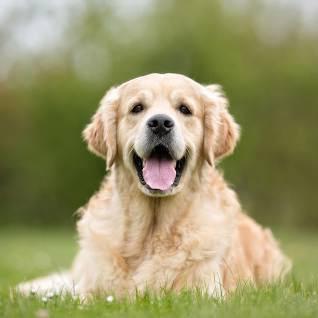

1/1 [==============================] - 0s 62ms/step
[[-5.4581513  5.4054775]]
1
The image represents a Dog


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat_ml.jpeg


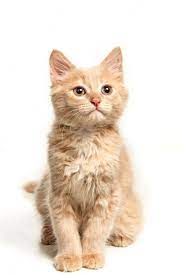

1/1 [==============================] - 0s 58ms/step
[[ 4.912981  -6.6434274]]
0
The image represents a Cat


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')